In [65]:
%pylab inline
rcParams["figure.figsize"] = (16,5)

import sys
sys.path.insert(0, "..")

Populating the interactive namespace from numpy and matplotlib


In [66]:
!pip3 install pysptk

In [67]:
!pip3 install pyworld

In [68]:
import torch

from scipy.io import wavfile
import pysptk
from pysptk.synthesis import Synthesizer, MLSADF
import pyworld
from os.path import join, basename

#from nnmnkwii import preprocessing as P
#from nnmnkwii.paramgen import unit_variance_mlpg_matrix

#import gantts
#from hparams import vc as hp

import librosa
import librosa.display
import IPython
from IPython.display import Audio

In [69]:
from os.path import join, basename

In [133]:
name = "1.wav"

path_algan="/content/data/algan_vc/"
path_cycle="/content/data/cyclegan_vc/"
path_cycle2="/content/data/cyclegan_vc2/"
path_spcycle="/content/data/sp_cycle/"
path_cycle_drn="/content/data/al_drn/"
path_cycle_blrs="/content/data/al_blrs/"
path_cycle_l1="/content/data/al_l1/"
path_cycle_l2="/content/data/al_l2/"




src_path_algan = join(path_algan, name)
src_path_cycle= join(path_cycle, name)
src_path_cycle2 = join(path_cycle2, name)
src_path_spcycle = join(path_spcycle, name)
src_path_cycle_drn = join(path_cycle_drn, name)
src_path_cycle_blrs = join(path_cycle_blrs, name)
src_path_cycle_l1 = join(path_cycle_l1, name)
src_path_cycle_l2= join(path_cycle_l2, name)


In [134]:
print(src_path_algan)
print(src_path_cycle)
print(src_path_cycle2)
print(src_path_spcycle)
print(src_path_cycle_drn)
print(src_path_cycle_blrs)
print(src_path_cycle_l1)
print(src_path_cycle_l2)


/content/data/algan_vc/1.wav
/content/data/cyclegan_vc/1.wav
/content/data/cyclegan_vc2/1.wav
/content/data/sp_cycle/1.wav
/content/data/al_drn/1.wav
/content/data/al_blrs/1.wav
/content/data/al_l1/1.wav
/content/data/al_l2/1.wav


In [135]:
def compute_static_features(path):
    fs, x = wavfile.read(path)
    x = x.astype(np.float64)
    f0, timeaxis = pyworld.dio(x, fs, frame_period=5.0)
    f0 = pyworld.stonemask(x, f0, timeaxis, fs)
    spectrogram = pyworld.cheaptrick(x, f0, timeaxis, fs)
    aperiodicity = pyworld.d4c(x, f0, timeaxis, fs)
    alpha = pysptk.util.mcepalpha(fs)
    mc = pysptk.sp2mc(spectrogram, order=24, alpha=alpha)
    c0, mc = mc[:, 0], mc[:, 1:]
    return mc

In [136]:
algan=compute_static_features(src_path_algan).T
cycle=compute_static_features(src_path_cycle).T
cycle2=compute_static_features(src_path_cycle2).T
spcycle=compute_static_features(src_path_spcycle).T
drn=compute_static_features(src_path_cycle_drn).T
blrs=compute_static_features(src_path_cycle_blrs).T
l1=compute_static_features(src_path_cycle_l1).T
l2=compute_static_features(src_path_cycle_l2).T


In [137]:
print(algan)
print(cycle)
print(cycle2)
print(spcycle)
print(drn)
print(blrs)
print(l1)
print(l2)


[[ 1.3131569   1.60233516  1.63695636 ...  1.59405585  1.28829475
   1.53959776]
 [ 0.2587608   0.53394622  1.00088567 ...  0.77273482  1.01669923
   0.81747886]
 [ 0.13385834  0.5678348   0.73100186 ...  0.7584987   0.60143339
   0.44346203]
 ...
 [-0.01805646 -0.05203202 -0.09341742 ... -0.0786964   0.00903039
  -0.0645766 ]
 [ 0.01514217  0.05275523  0.09095819 ...  0.0756625   0.00376971
   0.04516635]
 [-0.00891123 -0.02544251 -0.06735968 ... -0.0761413   0.00286845
  -0.03978352]]
[[ 1.22635957  0.93799434  1.70666618 ...  1.09831152  1.7460285
   1.32576305]
 [ 0.95324925  1.08211377  1.0972831  ...  0.71344568  1.12750068
   1.0080546 ]
 [ 0.41977535  0.90164807  0.89005769 ...  0.33768608  0.768939
   0.84247334]
 ...
 [-0.03951329 -0.02769153  0.04522893 ... -0.07859321  0.07370973
   0.00336731]
 [ 0.02986876  0.01370133 -0.06472597 ...  0.03878043 -0.08673364
   0.00638038]
 [ 0.00200453  0.01290314  0.04264736 ...  0.01696832  0.06676012
   0.01775047]]
[[ 1.59636311e+00  

In [158]:
def vis_difference(idx, algan,cycle, cycle2, spcycle, drn, blrs, l1, l2, which_dims=8, T_max=None):
    #static_paramgen = MLPG(gmm, windows=[(0,0, np.array([1.0]))], diff=False)
    #paramgen = MLPG(gmm, windows=windows, diff=False)

    #x = trim_zeros_frames(x)
    #y = trim_zeros_frames(y)[:,:static_dim]
    #y_hat1 = static_paramgen.transform(x)[:,:static_dim]
    #y_hat2 = paramgen.transform(x)
    
    fig, ax = plt.subplots()
    if T_max is not None:
        algan,cycle, cycle2, spcycle, drn, blrs, l1, l2 = algan[:T_max],cycle[:T_max],cycle2[:T_max],spcycle[:T_max],drn[:T_max],blrs[:T_max],l1[:T_max],l2[:T_max]

        

    #figure(figsize=(16,4))
    #for idx, which_dim in enumerate(which_dims):
    #subplot(len(which_dims), 1, idx+1)
    
    ax.plot(drn[:], "-", linewidth=2, label="ALGAN-VC without DRN")
    
   

    lgd=plt.legend(loc=0, prop={'size': 16}, bbox_to_anchor=(1, 1))

    #lgd=plt.legend(loc=0, prop={'size': 16}, bbox_to_anchor=(1, 1))

    #ax.legend(fontsize=16)


    #xlim(0, 100) # 50hz cutoff
    # xlim(0, 100)
    #legend(prop={"size": 18})
    #ax.set_xticklabels(values[::400])
    
    #print(values)

    plt.xlabel("Frame index",fontsize=14)
    plt.ylabel("{}-th Mel-cepstrum".format(idx),fontsize=18)
    #plt.title("Set X labels in Matplotlib Plot")
    fig.savefig("names{:03}.png".format(idx), bbox_extra_artists=(lgd,), bbox_inches='tight')

<Figure size 2400x2400 with 0 Axes>

<Figure size 2160x1296 with 0 Axes>

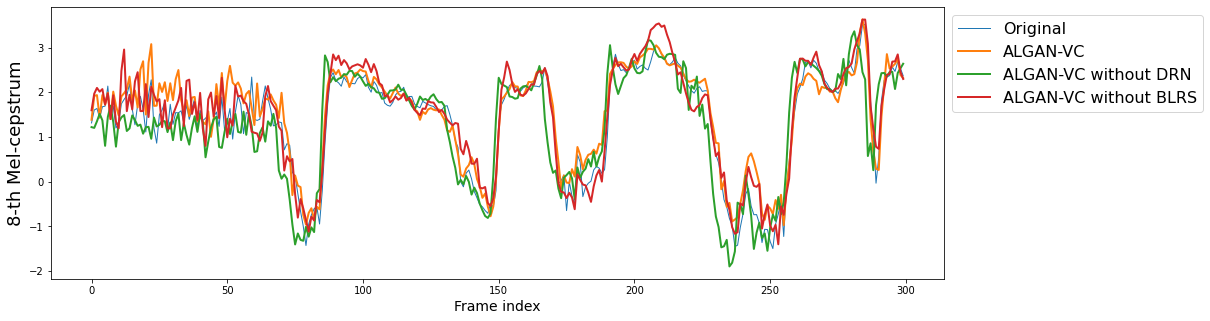

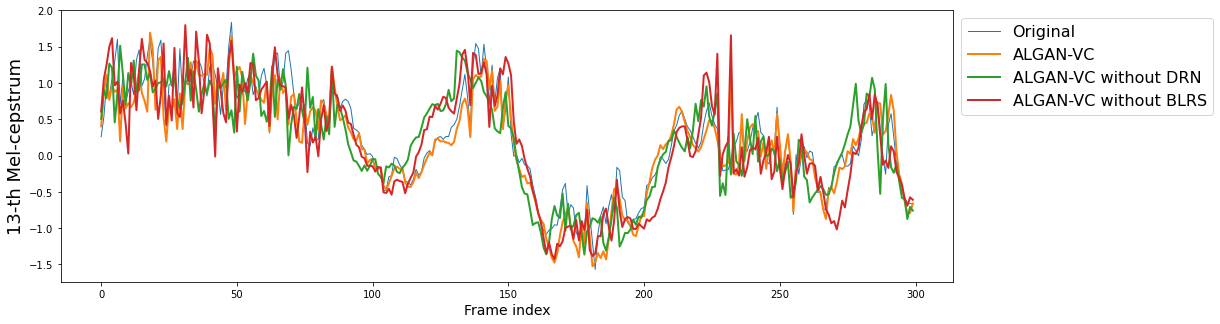

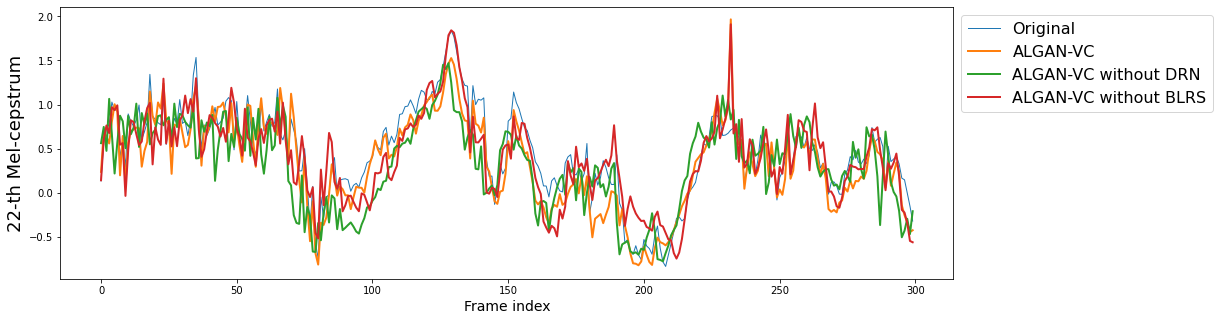

In [159]:

dims = [ 8,13, 22]
figure(figsize=(30, 30), dpi=80)
figure(figsize=(30, 6*len(dims)))


for idx, dim in enumerate(dims):

    #vis_difference(X_aligned[idx], Y_aligned[idx], T_max=300, which_dims=which_dims)
    vis_difference(dim, algan[idx],cycle[idx], cycle2[idx], spcycle[idx], drn[idx], blrs[idx], l1[idx], l2[idx],  which_dims=8, T_max=300,)

#which_dims = np.arange(0, static_dim, step=2)
